### Task 1: Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.


## 1. Imports
Let's first import all the libraries that required to perform this task.

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 2. Load the dataset

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


Let's see all the columns to find out all the features

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Since the task asked us to use only square footage, number of bedrooms and bathrooms, lets choose only those features.

In [7]:
train_new = train[["BedroomAbvGr", "LotArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", 'SalePrice']]
test_new = test[["BedroomAbvGr", "LotArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"]]

In [8]:
train_new.head(10)

,BedroomAbvGr,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,SalePrice
0,3,8450,1,0,2,1,208500
1,3,9600,0,1,2,0,181500
2,3,11250,1,0,2,1,223500
3,3,9550,1,0,1,0,140000
4,4,14260,1,0,2,1,250000
5,1,14115,1,0,1,1,143000
6,3,10084,1,0,2,0,307000
7,3,10382,1,0,2,1,200000
8,2,6120,0,0,2,0,129900
9,2,7420,1,0,1,0,118000


In [9]:
test_new.head(10)

,BedroomAbvGr,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,2,11622,0.0,0.0,1,0
1,3,14267,0.0,0.0,1,1
2,3,13830,0.0,0.0,2,1
3,3,9978,0.0,0.0,2,1
4,2,5005,0.0,0.0,2,0
5,3,10000,0.0,0.0,2,1
6,3,7980,1.0,0.0,2,0
7,3,8402,0.0,0.0,2,1
8,2,10176,1.0,0.0,1,1
9,2,8400,1.0,0.0,1,0


**Selected Input Features**
1. BedroomAbvGr:  Number of bedrooms above ground
2. LotArea:  Lot size in square feet
3. BsmtFullBath: Basement full bathrooms
4. BsmtHalfBath: Basement half bathrooms
5. FullBath: Full bathrooms above grade
6. HalfBath: Half baths above grade

**Output Feature**
1. SalePrice: Sale Price

## 3. Data Analysis
Let's analyze our new data.

In [10]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BedroomAbvGr  1460 non-null   int64
 1   LotArea       1460 non-null   int64
 2   BsmtFullBath  1460 non-null   int64
 3   BsmtHalfBath  1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   HalfBath      1460 non-null   int64
 6   SalePrice     1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


Training set have no null values. So, we don't need to perform data cleaning on training set.

In [11]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BedroomAbvGr  1459 non-null   int64  
 1   LotArea       1459 non-null   int64  
 2   BsmtFullBath  1457 non-null   float64
 3   BsmtHalfBath  1457 non-null   float64
 4   FullBath      1459 non-null   int64  
 5   HalfBath      1459 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 68.5 KB


As we can see, in test set there are some null values in features: `BsmtFullBath` and `BsmtHalfBath`, we need to perform data cleaning here.

We have two ways to perform the data cleaning:
1. Fill the null values
2. Remove the datapoint which has any null value

Since both the features `BsmtFullBath` and `BsmtHalfBath` has only discrete values, we can fill null value with the value which is most frequently occuring in these features. But, instead of doing this, we can just remove the data-points, cause we only have to remove 2 datapoints which doesn't affect the model training.

In [12]:
test_new = test_new.dropna()

In [13]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1457 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BedroomAbvGr  1457 non-null   int64  
 1   LotArea       1457 non-null   int64  
 2   BsmtFullBath  1457 non-null   float64
 3   BsmtHalfBath  1457 non-null   float64
 4   FullBath      1457 non-null   int64  
 5   HalfBath      1457 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 79.7 KB


Lets describe the data

In [14]:
train_new.describe()

,BedroomAbvGr,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.866438,10516.828082,0.425342,0.057534,1.565068,0.382877,180921.195890
std,0.815778,9981.264932,0.518911,0.238753,0.550916,0.502885,79442.502883
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,2.000000,7553.500000,0.000000,0.000000,1.000000,0.000000,129975.000000
50%,3.000000,9478.500000,0.000000,0.000000,2.000000,0.000000,163000.000000
75%,3.000000,11601.500000,1.000000,0.000000,2.000000,1.000000,214000.000000
max,8.000000,215245.000000,3.000000,2.000000,3.000000,2.000000,755000.000000


In [15]:
test_new.describe()

,BedroomAbvGr,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,2.853123,9796.299931,0.434454,0.065202,1.570350,0.377488
std,0.828148,4861.091236,0.530648,0.252468,0.554105,0.503000
min,0.000000,1470.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,7392.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,9399.000000,0.000000,0.000000,2.000000,0.000000
75%,3.000000,11515.000000,1.000000,0.000000,2.000000,1.000000
max,6.000000,56600.000000,3.000000,2.000000,4.000000,2.000000


Let's take a look into the correleation between features in the training data

<Axes: >

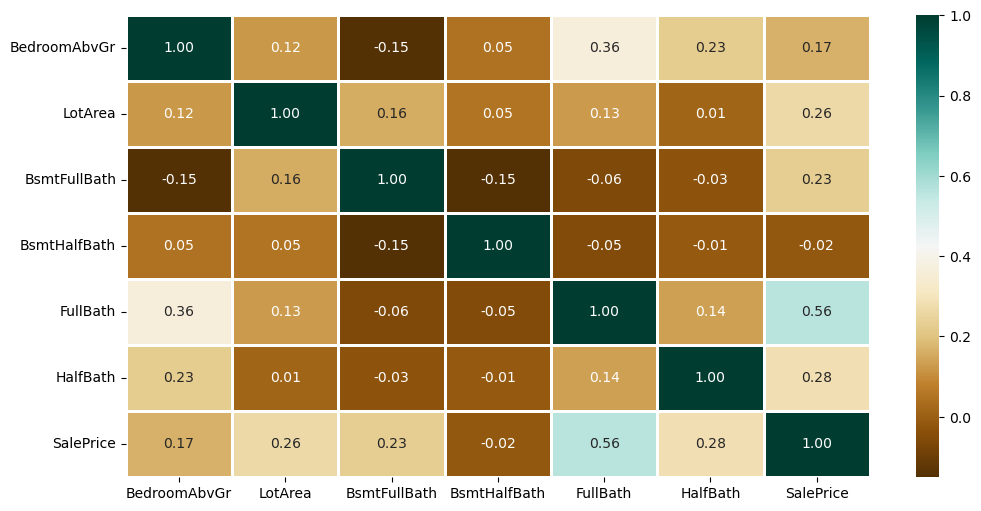

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_new.corr(), cmap = 'BrBG',fmt = '.2f',linewidths = 2,annot = True)

As we can see from the above plot, correlation between the features is quite low.

## 4. Split the dataset
X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [17]:
X = train_new.drop(['SalePrice'],axis = 1)  # Features
y = train_new['SalePrice']  # Target variable

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)

(1168, 6)
(1168,)
(292, 6)
(292,)


In [20]:
X_test = test_new
print(X_test.shape)

(1457, 6)


Since `test.csv` has no output features, we are going to use it only for inference.

## 5. Model Building and Training
The linear regression model can be build from scratch or used pre-built function from Python libraries like `statmodels` and `sklearn`.
In this experiment, we going to use sklearn and used pre-built function to build and train the linear regresssion model.

In [21]:
model = LinearRegression()

Lets fit the model

In [22]:
model.fit(X_train.values, y_train.values)

LinearRegression()

In [23]:
print("Intercept: ", model.intercept_)

Intercept:  38146.0504481713


## 6. Model Evaluation
Lets evaluate the trained model using validation data.

In [24]:
y_preds = model.predict(X_valid.values)
print(y_preds.shape)

(292,)


There are a lots of evaluation metrics such as, `mean squared error`, `mean absolute error`, `root mean squared error`, etc to check how good the model performed on the validation dataset. Lower the value of these metrics, better will be the performance of the model.

In [25]:
print("Mean Squared Error: ", mean_squared_error(y_valid.values, y_preds))
print("Mean Absolute Error: ", mean_absolute_error(y_valid.values, y_preds))

Mean Squared Error:  3994446760.838479
Mean Absolute Error:  41678.43702521779


Check also the distribution of the mean squared error and mean absolute error on test data.

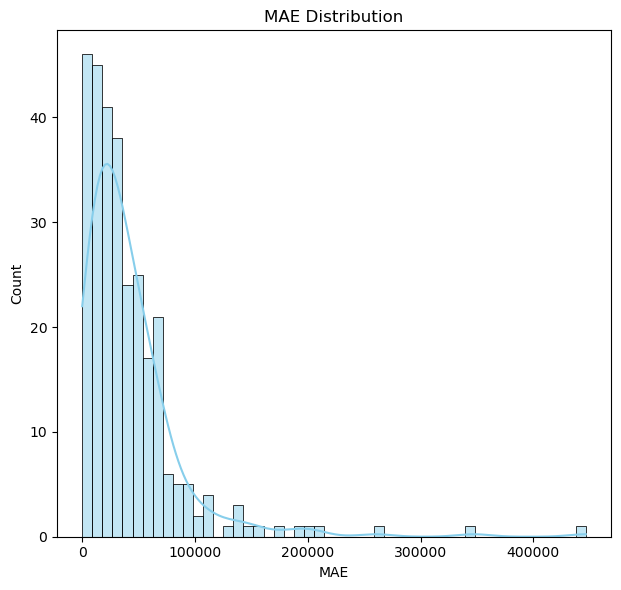

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(np.abs(y_preds - y_valid.values), bins=50, kde=True, color='skyblue')
plt.title('MAE Distribution')
plt.xlabel('MAE')
plt.tight_layout()
plt.show()


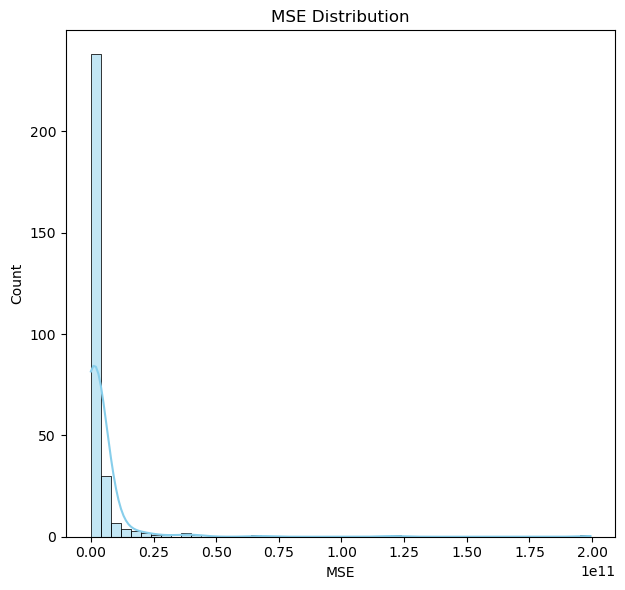

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(np.square(y_preds - y_valid.values), bins=50, kde=True, color='skyblue')
plt.title('MSE Distribution')
plt.xlabel('MSE')
plt.tight_layout()
plt.show()


When you have six features, visualizing the predicted data points becomes challenging because it would require a six-dimensional space. However, you can still plot against individual features or pairs of features to get a sense of how the model fits the data.

Here's an example using a pair of features for visualization. In this case, I'll assume you want to visualize the line of best fit against 'LotArea' and 'BedroomAbvGr':

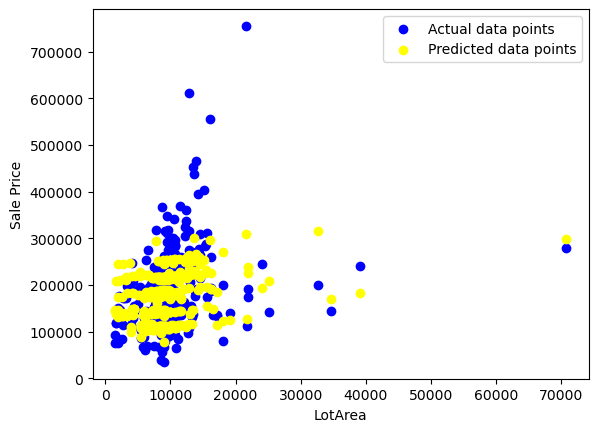

In [28]:
# Choose two features for visualization
feature1_for_plot = 'LotArea'
feature2_for_plot = 'BedroomAbvGr'

X_plot = X_valid[[feature1_for_plot, feature2_for_plot]]


# Plot the scatter plot of the chosen features
plt.scatter(X_plot[feature1_for_plot], y_valid, color='blue', label='Actual data points')
plt.scatter(X_plot[feature1_for_plot], y_preds.reshape(-1, 1), color='yellow', label='Predicted data points')


# Labeling axes and adding a legend
plt.xlabel(feature1_for_plot)
plt.ylabel('Sale Price')
plt.legend()

# Show the plot
plt.show()


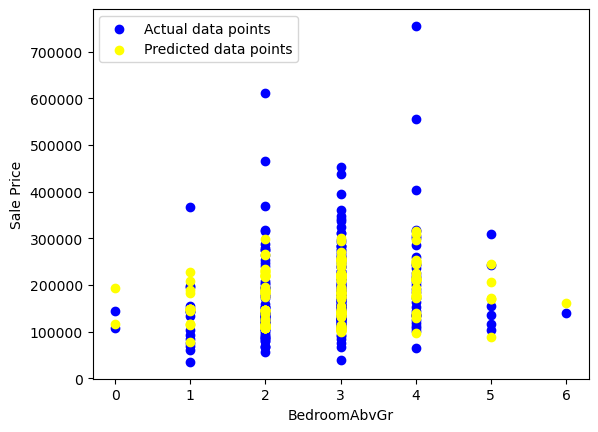

In [29]:
# Plot the scatter plot of the chosen features
plt.scatter(X_plot[feature2_for_plot], y_valid, color='blue', label='Actual data points')
plt.scatter(X_plot[feature2_for_plot], y_preds.reshape(-1, 1), color='yellow', label='Predicted data points')


# Labeling axes and adding a legend
plt.xlabel(feature2_for_plot)
plt.ylabel('Sale Price')
plt.legend()

# Show the plot
plt.show()


Cross-validation is a resampling technique used to assess the performance of a machine learning model, including linear regression, by partitioning the dataset into subsets. The purpose of cross-validation is to estimate how well a model will generalize to an independent dataset. The most common form of cross-validation is k-fold cross-validation.

Performing cross-validation in scikit-learn for linear regression involves using the cross_val_score function from the sklearn.model_selection module. I'll walk you through the process step by step.

In [30]:
# Perform 10-fold cross-validation and print the R-squared scores
cross_val_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print("Cross-Validation R-squared scores:", cross_val_scores)
print("Average R-squared:", cross_val_scores.mean())

Cross-Validation R-squared scores: [0.54540412 0.41196057 0.34643642 0.44564109 0.44171661 0.44918989
 0.41325056 0.51742602 0.39040131 0.43504718]
Average R-squared: 0.4396473769168862


Now, it's time to use the test data for model inference.

In [31]:
y_test = model.predict(X_test.values)

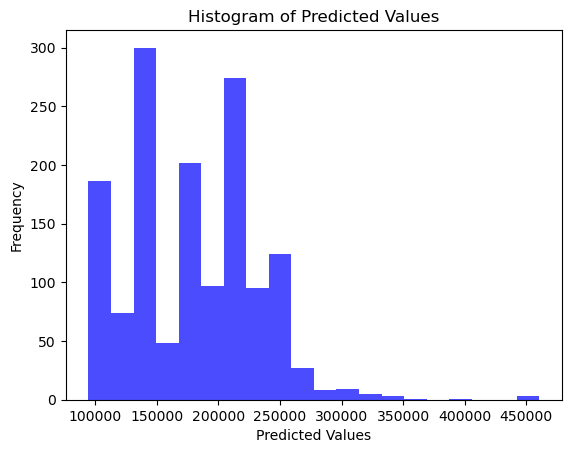

In [32]:
# Lets plot the histogram to visualize the distribution of predicted values.
plt.hist(y_test, bins=20, color='blue', alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values')
plt.show()

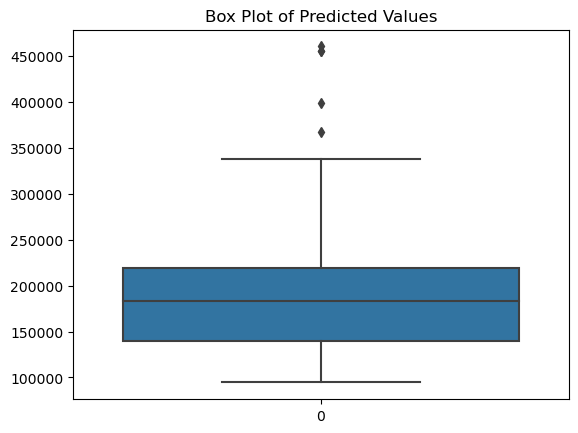

In [33]:
# Create a box plot to visualize the distribution and identify potential outliers.
sns.boxplot(y_test)
plt.title('Box Plot of Predicted Values')
plt.show()

## 7. Model Saving
Lets save our model in pickel form so that we can deploy it in the future.

In [34]:
# Save the model to a pickle file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [35]:
# Sanity check
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

## 8. Conclusion
In conclusion, it is found that, we successfully did all the steps from loading dataset to model saving that are required in order to solve a machine learning problem and found `Mean Squared Error:  3994446760.838479` and 
`Mean Absolute Error:  41678.43702521779`. Also, cross validation was done and the result is not that satisfactory, it is because we only taking few input features according to the task without doing EDA and feature engineering.